Create Dataset

In [49]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt


first_df=pd.read_csv('Arrests_cleaned.csv')

In [5]:
import requests, json
r = requests.get('https://data.cityofchicago.org/resource/crimes.json?$limit=600000')
data = r.json()
sec_df = pd.DataFrame(data)
sec_df = sec_df[['case_number','ward','district']]

In [6]:
merged_df = pd.merge(first_df, sec_df, on="case_number")
print(len(merged_df))
merged_df.head(1)

68416


,id,case_number,date_month,date_day,date_year,time,meridiem,race,charge_1_statute,charge_1_description,...,charge_4_statute,charge_4_description,charge_4_type,charge_4_class,CHARGES STATUTE,CHARGES DESCRIPTION,CHARGES TYPE,CHARGES CLASS,ward,district
0,30039812,JE183770,3,30,2021,12:10:00,AM,WHITE HISPANIC,720 ILCS 5.0/12-3.2-A-1,DOMESTIC BATTERY - BODILY HARM,...,NaN,NaN,NaN,NaN,720 ILCS 5.0/12-3.2-A-1 | | |,DOMESTIC BATTERY - BODILY HARM | | |,M | | |,A | | |,14,008


In [7]:
# races = {'BLACK': 1, 'WHITE': 2, 'WHITE HISPANIC': 3, 'BLACK HISPANIC': 4, 'ASIAN / PACIFIC ISLANDER': 5, 'AMER INDIAN / ALASKAN NATIVE': 6, 'UNKNOWN / REFUSED': 7}
# merged_df['race'] = merged_df['race'].apply(lambda x: races[x])
# merged_df = merged_df[['race','ward','district','date_day','date_year','charge_1_type']].dropna()
# merged_df.head(1)


In [8]:
races = merged_df.loc[:, "race"].unique().tolist()
race_dummies = pd.get_dummies(merged_df, columns=["race"])
races = ["race_"+r for r in races]
race_dummies = race_dummies[races]
race_dummies

,race_WHITE HISPANIC,race_BLACK,race_BLACK HISPANIC,race_WHITE,race_ASIAN / PACIFIC ISLANDER,race_AMER INDIAN / ALASKAN NATIVE,race_UNKNOWN / REFUSED
0,1,0,0,0,0,0,0
1,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...
68411,0,0,1,0,0,0,0
68412,0,1,0,0,0,0,0
68413,0,1,0,0,0,0,0
68414,1,0,0,0,0,0,0


In [9]:
# dummy_races = ['amer_indian/alaskan_native', \
#                'asian/pacific islander', 'black', 'black_hispanic', \
#                'unknown/refused', 'white', 'white_hispanic']
# for dummy in dummy_races:
#     merged_df[dummy] = merged_df['race']

# races = merged_df.loc[:, "race"].unique()
# race_dummies = pd.get_dummies(merged_df, columns=['race'])
# race_dummies = race_dummies[dummy_races]
# print(race_dummies)


merged_df = merged_df[['ward','district','date_day','date_year','charge_1_type']]

merged_df = pd.concat([merged_df, race_dummies], axis=1).dropna()

In [10]:
merged_df

,ward,district,date_day,date_year,charge_1_type,race_WHITE HISPANIC,race_BLACK,race_BLACK HISPANIC,race_WHITE,race_ASIAN / PACIFIC ISLANDER,race_AMER INDIAN / ALASKAN NATIVE,race_UNKNOWN / REFUSED
0,14,008,30,2021,M,1,0,0,0,0,0,0
1,22,010,23,2021,M,0,1,0,0,0,0,0
2,7,004,16,2021,F,0,1,0,0,0,0,0
3,24,011,16,2021,F,0,1,0,0,0,0,0
4,13,008,16,2021,M,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
68411,22,010,7,2022,F,0,0,1,0,0,0,0
68412,34,022,7,2022,M,0,1,0,0,0,0,0
68413,9,005,7,2022,F,0,1,0,0,0,0,0
68414,7,003,7,2022,F,1,0,0,0,0,0,0


In [29]:
from sklearn.model_selection import train_test_split

x = merged_df[['race_WHITE HISPANIC','race_BLACK','race_BLACK HISPANIC','race_WHITE','race_ASIAN / PACIFIC ISLANDER','race_AMER INDIAN / ALASKAN NATIVE', \
    'race_UNKNOWN / REFUSED','ward','district','date_day','date_year']]
y = merged_df[['charge_1_type']]
m_charge_types = merged_df.loc[:, "charge_1_type"].replace('A', 'M')
m_charge_types = m_charge_types.replace('R', 'O')
m_charge_types = m_charge_types.replace('V', 'O')
multi_class_types = pd.factorize(m_charge_types)
multi_class_types = multi_class_types[0]
X_train, X_test, y_train, y_test = train_test_split(x,  multi_class_types, test_size=0.2, random_state=2)

array([0, 0, 1, ..., 1, 0, 0], dtype=int64)

Random Forest

In [62]:
# creating a Random Forest classifier
from sklearn.model_selection import cross_val_score
clf_m = RandomForestClassifier(n_estimators = 100,random_state=0)

# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf_m.fit(X_train, y_train)
scores_RF = cross_val_score(clf_m, X_train,y_train, cv=5)

In [67]:
from sklearn.model_selection import GridSearchCV
#n_estimators max_depth min_samples_leaf min_samples_split max_features
parameters = {'max_depth':[i for i in range(6, 17,2)],'min_samples_leaf':[i for i in range(9, 15)]}
clf_mCV = GridSearchCV(clf_m, parameters,cv=5)
clf_mCV.fit(X_train,y_train)
clf_mCV.cv_results_

{'mean_fit_time': array([0.85462165, 0.81692591, 0.80849996, 0.80390739, 0.80139813,
        0.80652351, 0.92657747, 0.92889633, 0.92842369, 0.92543392,
        0.92325087, 0.92188754, 1.04312534, 1.03954844, 1.04197898,
        1.03302379, 1.03299799, 1.02265258, 1.153124  , 1.13322043,
        1.12462597, 1.1172575 , 1.11608129, 1.11014123, 1.21195703,
        1.19524012, 1.1936152 , 1.17783632, 1.17256212, 1.1750473 ,
        1.25494423, 1.23818178, 1.22840099, 1.21846228, 1.20389099,
        1.20453076]),
 'std_fit_time': array([0.01770367, 0.00911613, 0.01428092, 0.01141985, 0.0089325 ,
        0.00941859, 0.01240608, 0.01177749, 0.01137504, 0.00802674,
        0.00580319, 0.00911827, 0.00987618, 0.00650865, 0.01682388,
        0.00464009, 0.00378156, 0.00746576, 0.02310867, 0.0059003 ,
        0.00943613, 0.00801651, 0.02116335, 0.00585016, 0.01870305,
        0.00556465, 0.00984891, 0.01136672, 0.00621974, 0.00722743,
        0.01144408, 0.00752879, 0.0124706 , 0.01184188, 0.007

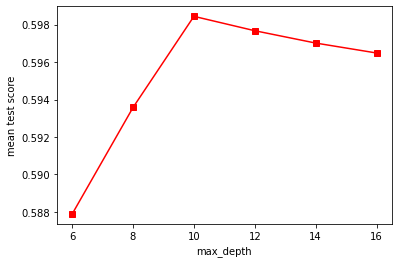

In [68]:
x = [i for i in range(6,17,2)]
k1 = clf_mCV.cv_results_['mean_test_score'][3::6]
plt.plot(x,k1,'s-',color = 'r')
plt.xlabel("max_depth")
plt.ylabel("mean test score")
plt.show()

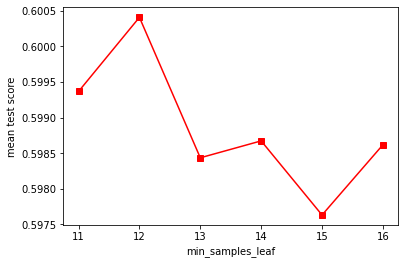

In [69]:
x = [i for i in range(11,17)]
k1 = clf_mCV.cv_results_['mean_test_score'][13:19]
plt.plot(x,k1,'s-',color = 'r')
plt.xlabel("min_samples_leaf")
plt.ylabel("mean test score")
plt.show()

In [74]:
clf_m = RandomForestClassifier(n_estimators = 100,max_depth=10,min_samples_leaf=12,random_state=0)
parameters = {'max_features':[i for i in range(4, 9)],'min_samples_split':[i for i in range(33,39)]}
clf_mCV = GridSearchCV(clf_m, parameters,cv=5)
clf_mCV.fit(X_train,y_train)
clf_mCV.cv_results_

{'mean_fit_time': array([1.36361451, 1.35482721, 1.33421535, 1.33721271, 1.36348429,
        1.34569931, 1.51231031, 1.50541425, 1.51548214, 1.50513701,
        1.51831112, 1.5181684 , 1.70699263, 1.70045919, 1.6924643 ,
        1.70229864, 1.69588108, 1.68666234, 1.88961387, 1.89000883,
        1.88159614, 1.8999239 , 1.86930275, 1.89240565, 2.08755865,
        2.06248693, 2.07323098, 2.06803803, 2.05596328, 2.05046062]),
 'std_fit_time': array([0.02407772, 0.01771629, 0.00709468, 0.00599405, 0.02353794,
        0.01510249, 0.00964945, 0.0080388 , 0.01449677, 0.00901247,
        0.01880275, 0.01475782, 0.0080721 , 0.02366604, 0.00557084,
        0.02064386, 0.01094898, 0.0208944 , 0.02755868, 0.02481275,
        0.01918942, 0.01894434, 0.02144438, 0.02859312, 0.03350826,
        0.01002453, 0.0234619 , 0.0234406 , 0.02256188, 0.01647882]),
 'mean_score_time': array([0.11789756, 0.11893692, 0.11721115, 0.12010803, 0.11934447,
        0.11872244, 0.11949143, 0.12108173, 0.12217965, 0.12

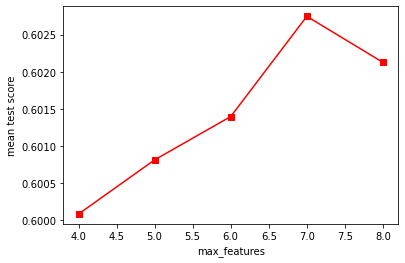

In [77]:
x = [i for i in range(4, 9)]
k1 = clf_mCV.cv_results_['mean_test_score'][3::6]
plt.plot(x,k1,'s-',color = 'r')
plt.xlabel("max_features")
plt.ylabel("mean test score")
plt.show()

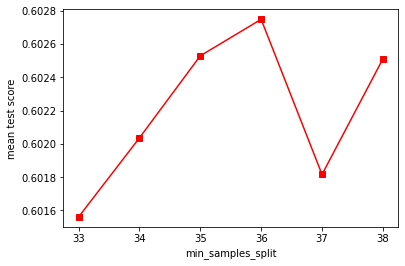

In [78]:
x = [i for i in range(33,39)]
k1 = clf_mCV.cv_results_['mean_test_score'][18:24]
plt.plot(x,k1,'s-',color = 'r')
plt.xlabel("min_samples_split")
plt.ylabel("mean test score")
plt.show()

In [75]:
clf_m = RandomForestClassifier(n_estimators = 100,max_depth=10,min_samples_leaf=12,max_features=7,min_samples_split=36)
clf_m.fit(X_train, y_train)
scores_RF = cross_val_score(clf_m, X_train,y_train, cv=5)

In [76]:
scores_RF.mean()

0.6025288878156543

In [79]:
# performing predictions on the test dataset
y_pred_m = clf_m.predict(X_test)

# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred_m))

ACCURACY OF THE MODEL:  0.5992544949568777


The best Random Forest model has an accuracy of 0.599